In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Add mavenn to path
import sys
path_to_mavenn_local = '/Users/jkinney/github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

# Load mavenn and check path
import mavenn
mavenn.__path__

['/Users/jkinney/github/mavenn/mavenn']

/Users/jkinney/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/jkinney/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

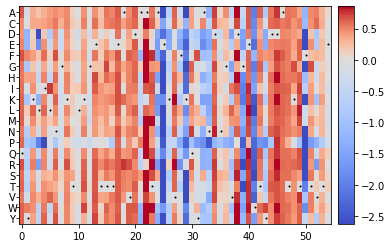

In [5]:
# Load model
ge_model = mavenn.load('20.08.26_load_models_for_JBK/model_files/gaussian_GB1_model')

# Set wt sequence
wt_seq = 'QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTE'

# Comptue effects
mat_df = ge_model.get_1pt_effects(wt_seq=wt_seq, out_format="matrix")

# Draw heatmap
ax, cb = mavenn.src.utils.heatmap(df=mat_df, wt_seq=wt_seq)

In [4]:
# from mavenn.src.error_handling import handle_errors, check

# @handle_errors
# def heatmap(df,
#             wt_seq=None,
#             wt_at_zero=True,
#             ax=None,
#             cbar=True,
#             cax=None,
#             clim=None,
#             clim_quantile=.95,
#             ccenter=0,
#             cmap='coolwarm', 
#             cmap_size="5%",
#             cmap_pad=0.1):
    
#     """
#     Draws a heatmap illustrating a matrix of parameters.
    
#     parameters
#     ----------
    
#     df: (pd.DataFrame)
#         A matrix specifying additive parameter values. 
#         Rows correspond to positions while columns correspond 
#         to characters. Column names must be single 
#         characters and row indices must be integers.
        
#     wt_seq: (str)
#         The wild-type sequence. Must have length len(df)
#         and be comprised of characters in df.columns.
        
#     wt_at_zero: (bool)
#         Whether to subtract values from each row in df so that
#         the wild-type character at each position has 
#         effect zero. This is common in heatmap representations
#         of DMS experiments. 
        
#     ax: (matplotlib.axes.Axes)
#         The Axes object on which the heatmap will be drawn.
#         If None, one will be created. If specified, cbar=True,
#         and cax=None, ax will be split in two to make room for 
#         colorbar.
        
#     cbar: (bool)
#         Whether to draw a colorbar. 
        
#     cax: (matplotlib.axes.Axes)
#         The Axes object on which the colorbar will be drawn
#         if requested. If None, one will be created by splitting 
#         ax in two according to cmap_size and cmpa_pad. 
        
#     clim: (array of form [cmin, cmax])
#         Optional specification of the maximum and minimum effect
#         values spanned by the colormap. Overrides clim_quantile.
        
#     clim_quantile: (float in [0,1])
#         If set, clim will automatically chosen to include the specified 
#         fraction of effect sizes.
        
#     ccenter: (float)
#         The effect value at which to position the center of a diverging
#         colormap. A value of ccenter=0 often makes sense, especially if
#         using wt_at_zero=True.
        
#     cmap: (str or matplotlib.colors.Colormap)
#         Colormap to use.
        
#     cmap_size: (str)
#         Specifies the fraction of ax width used for colorbar. 
#         See documentation for 
#             mpl_toolkits.axes_grid1.make_axes_locatable().
        
#     cmap_pad: (float)
#         Specifies space between colorbar and shrunken ax.
#         See documentation for 
#             mpl_toolkits.axes_grid1.make_axes_locatable().
            
#     returns
#     -------
    
#     ax: (matplotlib.axes.Axes)
#         Axes containing the heatmap.
    
#     cb: (matplotlib.colorbar.Colorbar)
#         Colorbar object linked to Axes.
#     """
    
#     # Special import needed
#     from mpl_toolkits.axes_grid1 import make_axes_locatable
#     from matplotlib.colors import DivergingNorm, Normalize
    
#     # Flip
#     df = df.loc[:,::-1]
    
#     # If wt_seq is set
#     if wt_seq:
        
#         # Verify wt_seq is valid
#         assert isinstance(wt_seq, str), f'type(wt_seq)={type(wt_seq)} is not str.'
        
#         # Verify wt_seq is composed of valid characters
#         wt_seq_set = set(wt_seq)
#         char_set = set(df.columns)
#         assert wt_seq_set <= char_set, f'wt_seq contains the following invalid characters: {wt_seq_set - char_set}'
        
#         # If using the wt gauge
#         if wt_at_zero:
#             for i, c_i in enumerate(wt_seq):
#                 df.loc[i,:] = df.loc[i,:]-df.loc[i,c_i]
#             if ccenter is None:
#                 ccenter = 0
                
#     # Set color lims to central 95% quantile
#     if clim is None:
#         vals = df.values.ravel()
#         clim = np.quantile(vals, q=[(1-clim_quantile)/2,1-(1-clim_quantile)/2])
    
#     # Create axis if none already exists
#     if ax is None:
#         fig, ax = plt.subplots()
#     else:
#         fig = ax.figure
        
    
#     # Set extent
#     Y = df.shape[1]
#     L = df.shape[0]
#     xlim = [-.5, L-.5]
#     ylim = [-.5, Y-.5]
    
#     # Needed to center colorbar at zero
#     if ccenter is not None:
#         norm = DivergingNorm(vmin=clim[0], vcenter=ccenter, vmax=clim[1])
#     else:
#         norm = Normalize(vmin=clim[0], vmax=clim[1])
    
#     # Plot GB1 heatmap
#     x_edges = np.arange(L+1)-.5
#     y_edges = np.arange(Y+1)-.5
#     im = ax.pcolormesh(x_edges,
#                        y_edges,
#                        df.T, 
#                        shading='flat',
#                        cmap=cmap, 
#                        clim=clim,
#                        norm=norm)

#     # Mark wt sequence
#     if wt_seq:
#         aas = list(df.columns)
#         for x, aa in enumerate(wt_seq):
#             y = aas.index(aa)
#             ax.plot(x,y,'.k', markersize=2)

#     # Style plot
#     ax.set_ylim(ylim)
#     ax.set_xlim(xlim)
#     ax.set_yticks(range(Y))
#     ax.set_yticklabels(df.columns, ha='center')
    
#     # Create colorbar if requested, make one
#     if cbar:
#         if cax is None:
#             cax = make_axes_locatable(ax).new_horizontal(size=cmap_size, pad=cmap_pad)
#             fig.add_axes(cax)
#         cb = plt.colorbar(im, cax=cax) 
    
#     # Otherwise, return None for cb
#     else:
#         cb = None
        
#     return ax, cb